# Creating a hd5 file containing a numpy array of binary random sequences that we generate ourself

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

DEBUG = False
DATA_FNAME = 'Akshay_Manjunath_hw1.hd5'

if DEBUG:
    num_sequences = 3
    sequence_length = 4
else:
    num_sequences = 25
    sequence_length = 20

### Enter your data here...
### Be sure to generate the data by hand:
###     copy-n-paste
###     use a random number generator 
###
x_list = [
    [0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1],
    [1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1],
    [0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0],
    [1,1,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1],
    [0,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0],
    [1,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1],
    [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],
    [0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0],
    [1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,1],
    [1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1],
    [0,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0],
    [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1],
    [1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,1,1],
    [1,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1],
    [0,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0],
    [1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0],
    [0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0],
    [1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1],
    [1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0,1,0,0,1],
    [0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0],
    [1,1,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1],
    [0,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0],
    [1,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1],
    [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],
    [0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0],
]

# convert list to a numpy array...
human_binary = np.asarray(x_list)

### do some error trapping:

assert human_binary.shape[0] == num_sequences, 'Error: the number of sequences was entered incorrectly'
assert human_binary.shape[1] == sequence_length, 'Error: the length of the seqeunces is incorrect'

# the with statement opens the file, does the business, and close it up for us...
with h5py.File(DATA_FNAME, 'w') as hf:
    hf.create_dataset('human_binary', data = human_binary)
    ## note you can write several data arrays into one hd5 file, just give each a different name.

###################
# Let's read it back from the file and then check to make sure it is as we wrote...
with h5py.File(DATA_FNAME, 'r') as hf:
    hb_copy = hf['human_binary'][:]

### this will throw and error if they are not the same...
np.testing.assert_array_equal(human_binary, hb_copy)

file_hd5 = h5py.File('Akshay_Manjunath_hw1.hd5', 'r')
list(file_hd5.keys())
print(hb_copy)

[[0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1]
 [1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1]
 [0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1]
 [0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0]
 [1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1]
 [1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1]
 [0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1]
 [1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1]
 [0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0]
 [1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0]
 [0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0]
 [1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1]
 [1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1]
 [0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1]
 [0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0]
 [1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1]
 [1 0 1 0 1

# Feedforward (MLP) Neural Network

In [7]:
# Feedforward (MLP) Neural Network

import numpy as np

w1 = np.array([[1, -2], [3, 4]]) 
w2 = np.array([[2, 2], [3, -3]]) 
b1 = np.array([[1, 0]]) 
b2 = np.array([[0,-4]]) 
x = np.array([[+1, -1]])
b1 = b1.transpose()
b2 = b2.transpose()
x = x.transpose()

z = np.dot(w1,x)
z_1 = np.add(z,b1)
y_1 = np.maximum(0,z_1)

m = np.dot(w2,y_1)
z_2 = np.add(m,b2)
y_2 = np.maximum(0,z_2)

print("the output activation is\n", y_2)

the output activation is
 [[8]
 [8]]


# Convolution of 2 signals

y(n) =  [1.   1.5  1.75 0.75 0.25]


<StemContainer object of 3 artists>

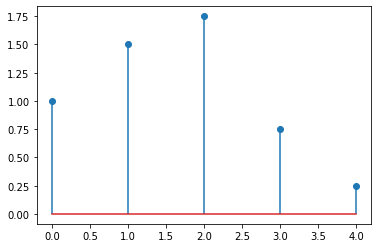

In [8]:
# Convolutions and Correlations
# Convolution of 2 signals

import matplotlib.pyplot as plt

x = [1,1,1]
h = [1,0.5,0.25]

y=np.convolve(x,h)
print("y(n) = " ,y)
plt.stem(y, use_line_collection=True)

# 2D Correlation and heatmap

[[0.   0.25 0.75 1.   1.   1.   0.75 0.25 0.  ]
 [0.   0.75 2.25 3.   3.   3.   2.25 0.75 0.  ]
 [0.   1.   3.   4.   4.   4.   3.   1.   0.  ]
 [0.   0.75 2.25 3.   3.   3.   2.25 0.75 0.  ]
 [0.   0.25 0.75 1.   1.   1.   0.75 0.25 0.  ]]


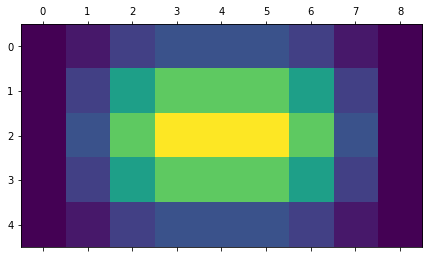

In [9]:
# 2D Correlation and heatmap

from scipy import signal

x = np.empty([3,5])
x.fill(1)
h = [[0,0.25,0.5,0.25,0],[0,0.5,1,0.5,0],[0,0.25,0.5,0.25,0]]
r = signal.convolve2d(x,h)
print(r)
plt.matshow(r, fignum = None)

# Magnitude Frequency response of ARMA filter

alpha:  0.9 
AR:  [1, -0.9] 
MA: [0.09999999999999998, 0]
alpha:  0.5 
AR:  [1, -0.5] 
MA: [0.5, 0]
alpha:  0.1 
AR:  [1, -0.1] 
MA: [0.9, 0]
alpha:  -0.5 
AR:  [1, 0.5] 
MA: [1.5, 0]


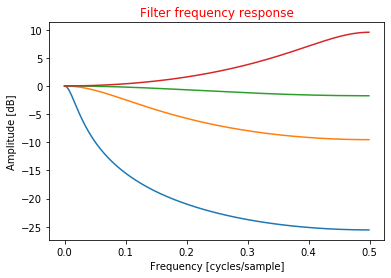

In [10]:
# Using Filters in Python
# Magnitude Frequency response 

alpha = [0.9, 0.5, 0.1, -0.5]
fig, ax1 = plt.subplots()
ax1.set_title('Filter frequency response', color='r')
ax1.set_ylabel('Amplitude [dB]')
ax1.set_xlabel('Frequency [cycles/sample]')

for i in alpha:
    x= [1, -1*i]
    y = [1-i, 0]
    print("alpha: ",i,"\nAR: ", x,"\nMA:", y)
    
    w,h = signal.freqz(y,x)
    plt.plot(w/(2*np.pi), 20*np.log10(abs(h)))

# Time Constant calculation

In [11]:
# Time constant

alp = [0.9, 0.5, 0.1]

for i in alp:
    time_const = (np.log(0.2)/np.log(i))
    print("Time constant for alpha = " , i," is",time_const)  

Time constant for alpha =  0.9  is 15.27553184782225
Time constant for alpha =  0.5  is 2.321928094887362
Time constant for alpha =  0.1  is 0.6989700043360189


# Designing a Butterworth Filter

AR : [ 1.00000000e+00 -2.49800181e-16  4.86028822e-01 -6.63518679e-17
  1.76648009e-02]
MA : [0.09398085 0.37592341 0.56388511 0.37592341 0.09398085]


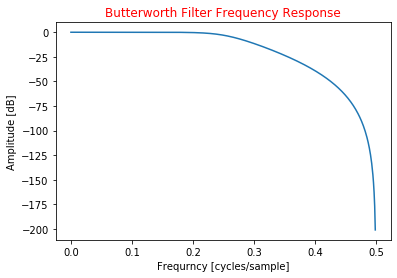

In [12]:
# Designing a Butterworth Filter

n, wn =signal.butter(4, 0.5)
w, h = signal.freqz(n,wn)
print("AR :", wn)
print("MA :", n)

plt.plot(w/(2*np.pi), 20*np.log10(abs(h)))
plt.title("Butterworth Filter Frequency Response", color='r')
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequrncy [cycles/sample]")
plt.show()

# IID realizations of a standard normal distribution

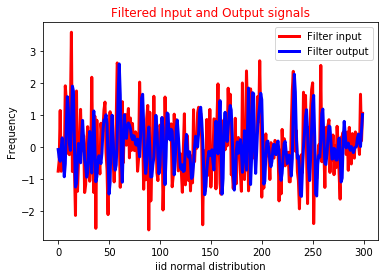

In [13]:
# iid realizations of a standard normal distribution

n, wn = signal.butter(4, 0.5)
iid = np.random.randn(300)
op = signal.lfilter(n, wn, iid)

plt.plot(iid, label = 'Filter input', color='r', linewidth=3.0)
plt.plot(op, label = 'Filter output',color='b', linewidth=3.0)
plt.title('Filtered Input and Output signals', color='r')
plt.xlabel('iid normal distribution')
plt.ylabel('Frequency')
plt.legend()
plt.show()